# Proyecto: Análisis de mercado inmobiliario

## Segundo proyecto

#### En el presente *notebook* intentaremos profundizar en el estudio y desarrollo de modelos de *machine learning* respecto al proyecto 01. 

#### Este *notebook* será organizado en tres partes, a saber: parte 'A' 'Transformación de datos' (ingieneria de features); parte 'B' 'Modelos Avanzados'; parte 'C' 'Interpretación de modelos'

## Parte 'A'

##### Comenzamos importando las librerias necesarias con los alias de uso general para simplificar su (re)utilizacion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import scipy as sp
import os 
import random

##### Cargamos el dataset de 'Properati', y corroboramos su dimensionalidad

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)

(146660, 19)


##### Imprimiremos cada columna con sus valores faltantes con el fin de evaluar qué hacer con esto en breve. Para comodidad inspeccionaremos qué porcentajes representan dentro de cada variable en la totalidad de instancias.

In [3]:
data.isna().sum().reset_index(name='Faltantes')

,index,Faltantes
0,start_date,0
1,end_date,0
2,created_on,0
3,lat,9925
4,lon,9959
5,l1,0
6,l2,0
7,l3,0
8,rooms,0
9,bedrooms,0


In [4]:
data.isnull().sum().sort_values(ascending = False)/len(data) * 100

surface_covered    14.737488
surface_total      13.996318
lon                 6.790536
lat                 6.767353
bathrooms           4.061776
operation_type      0.000000
l3                  0.000000
end_date            0.000000
created_on          0.000000
l1                  0.000000
l2                  0.000000
bedrooms            0.000000
rooms               0.000000
property_type       0.000000
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
start_date          0.000000
dtype: float64

##### Con las tablas anteriores tenemos que evaluar en concreto qué buscaremos analizar y cómo hacerlo. Al respecto prescindiremos de hacerlo con los datos faltantes de las features 'lat' y 'lon', variables que eliminaremos luego. Veremos asimismo más adelante que decisión podemos tomar respecto a los valores faltantes de *'bathrooms'*, pero detendremos un análisis de mayor profundidad respecto a las features *'surface_total'* y *'surface_covered'*
##### Con estas últimas dos mencionadas tenemos que tener presente que representan una cuantia significativa como para simplemente *dropear* toda esas instancias. Además conocemos de antemano (nos remitimos al proyecto 1) de una relación intrínseca entre estas variables, dado que se trata de dos medidas que a priori pudieran ser cuanto menos complementarias. Viendo que parecen cantidades 'equivalentes' (y que las separan 'solo' 1000 filas aproximadamente), pudieramos continuar por evaluar y estudiar la relacion entre estas variables y sus datos faltantes. El propósito será al menos establecer que no se tratan de valores faltantes del tipo MNAR, los cuales nos imposibilitarían a priori realizar imputaciones so riesgo de sesgar nuestro dataset al no ser (yo) una experta en el rubro. Si vemos que los *missing* son de una variable tipo MAR pudieramos establecer quizás un regresor con la variable independiente. Lo ideal al caso sería estadísticamente ver que son faltantes del tipo MCAR, es decir faltantes completamente aleatorias que no dependen de otras variables.
##### Nos valdremos entonces de la prueba de independencia de Chi2 (o distribución de Pearson) para determinar si existe asociación, utilizando una tabla de contingencia para verificar la frecuencia entre las categorias estudiadas. Comenzaremos por establecer una hipótesis nula (la de que los datos faltantes en las columnas 'surface_covered' y a su turno 'surface_total' no tienen correlación con otras variables). En estos casos el valor de p suele estar asociado a 0.05 o 0.01; tomaremos el primer caso.
##### Siendo asi definiremos una nueva columna llamada 'total_faltante' con datos que equivaldrán a 'True' si en 'surface_total' falta el dato o 'False' en caso contrario.

In [5]:
data['total_faltante'] = data['surface_total']

data['total_faltante'] = False

data.loc[data[data['surface_total'].isnull()].index, 'total_faltante'] = True

data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,total_faltante
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,False
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,False
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,False
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,False
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta,False
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta,False
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta,False
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta,False


##### Sigue identificar ahora si los valores 'True' de 'total_faltante' se corresponden con alguna/s de las otras variables; se aclara que este análisis no será hecho respecto a la variable 'price' ya que será a futuro nuestro grupo de datos 'y', ni tampoco con aquellas variables que descartaremos luego de nuestro dataset. Por lo tanto solo las estudiaremos respecto a rooms, bedrooms, bathrooms y surface_covered. Continuaremos el estudio repitiendo todo el proceso pero a su turno con surface_covered.

In [6]:
contigency= pd.crosstab(data['rooms'], data['total_faltante'], normalize='index') 
contigency

total_faltante,False,True
rooms,,
1.0,0.659292,0.340708
2.0,0.877819,0.122181
3.0,0.880000,0.120000
4.0,0.881988,0.118012
5.0,0.872614,0.127386
6.0,0.884264,0.115736
7.0,0.872737,0.127263
8.0,0.940887,0.059113
9.0,0.927966,0.072034


##### Importamos de la libreria de scipy el método para aplicar el analisis de chi2. Instanciaremos y evaluaremos nuestro valor p que debería ser mayor a 0.05.

In [7]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.995882023556434


##### Descartamos asi dependencia entre los faltantes de 'surface_covered' y 'rooms'. Seguimos con el resto de las features.

In [8]:
contigency= pd.crosstab(data['bedrooms'], data['total_faltante'], normalize='index') 
contigency

total_faltante,False,True
bedrooms,,
0.0,0.095405,0.904595
1.0,0.898662,0.101338
2.0,0.901282,0.098718
3.0,0.904383,0.095617
4.0,0.889513,0.110487
5.0,0.855352,0.144648
6.0,0.782552,0.217448
7.0,0.968992,0.031008
8.0,0.984615,0.015385


In [9]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.9524903289097284


In [10]:
contigency= pd.crosstab(data['bathrooms'], data['total_faltante'], normalize='index') 
contigency

total_faltante,False,True
bathrooms,,
1.0,0.884734,0.115266
2.0,0.886941,0.113059
3.0,0.863915,0.136085
4.0,0.844518,0.155482
5.0,0.865467,0.134533
6.0,0.787975,0.212025
7.0,0.831776,0.168224
8.0,0.764706,0.235294
9.0,1.000000,0.000000


In [12]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.9999985304075351


In [11]:
contigency= pd.crosstab(data['surface_covered'], data['total_faltante'], normalize='index') 
contigency

total_faltante,False,True
surface_covered,,
1.0,0.197531,0.802469
2.0,1.000000,0.000000
3.0,0.750000,0.250000
4.0,0.800000,0.200000
5.0,1.000000,0.000000
...,...,...
75792.0,1.000000,0.000000
90183.0,1.000000,0.000000
91970.0,1.000000,0.000000


In [12]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 1.0


##### Dado que el valor p es mayor que el 5% (0.05) en todos los casos analizados, tomamos el resultado como no significativo. Es decir que NO rechazamos la hipótesis nula (H0) y concluimos que las faltantes de 'surface_total' son independientes de las demás variables. De este modo concluímos que se tratan de faltantes de tipo MCAR.
##### Repetiremos el estudio pero ahora con 'surface_covered'.

In [13]:
data['cubierta_faltante'] = data['surface_covered']

data['cubierta_faltante'] = False

data.loc[data[data['surface_covered'].isnull()].index, 'cubierta_faltante'] = True

data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,total_faltante,cubierta_faltante
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,False,False
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,False,False
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,False,False
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,False,False
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,...,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,...,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta,False,False
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,...,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta,False,False
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,...,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta,False,False
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,...,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta,False,False


In [14]:
contigency= pd.crosstab(data['rooms'], data['cubierta_faltante'], normalize='index') 
contigency

cubierta_faltante,False,True
rooms,,
1.0,0.635490,0.364510
2.0,0.874840,0.125160
3.0,0.874992,0.125008
4.0,0.873807,0.126193
5.0,0.865621,0.134379
6.0,0.870549,0.129451
7.0,0.860669,0.139331
8.0,0.929803,0.070197
9.0,0.906780,0.093220


In [15]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.9962468746437663


In [16]:
contigency= pd.crosstab(data['bedrooms'], data['cubierta_faltante'], normalize='index') 
contigency

cubierta_faltante,False,True
bedrooms,,
0.0,0.091762,0.908238
1.0,0.890313,0.109687
2.0,0.895892,0.104108
3.0,0.896659,0.103341
4.0,0.881582,0.118418
5.0,0.832208,0.167792
6.0,0.760417,0.239583
7.0,0.957364,0.042636
8.0,0.861538,0.138462


In [17]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.9856528114898593


In [18]:
contigency= pd.crosstab(data['bathrooms'], data['cubierta_faltante'], normalize='index') 
contigency

cubierta_faltante,False,True
bathrooms,,
1.0,0.879950,0.120050
2.0,0.881156,0.118844
3.0,0.856486,0.143514
4.0,0.837934,0.162066
5.0,0.858612,0.141388
6.0,0.775316,0.224684
7.0,0.822430,0.177570
8.0,0.764706,0.235294
9.0,1.000000,0.000000


In [19]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 0.9999965320436067


In [20]:
contigency= pd.crosstab(data['surface_total'], data['cubierta_faltante'], normalize='index') 
contigency

cubierta_faltante,False,True
surface_total,,
10.0,1.0,0.0
11.0,1.0,0.0
12.0,1.0,0.0
13.0,1.0,0.0
14.0,1.0,0.0
...,...,...
130916.0,0.0,1.0
133000.0,0.0,1.0
153800.0,0.0,1.0


In [21]:
c, p, dof, expected = chi2_contingency(contigency)
print("El p-value es igual a {}".format(p))

El p-value es igual a 1.0


##### Nuevamente probamos que hay independencia entre los valores faltantes, en este caso de 'surface_covered', y el resto de las features. Concluímos en extenso de este modo que se tratan de faltantes tipo MCAR.
##### Hay razones estadísticas que (ante el tipo de dataset que tenemos) nos permitirían defender el aplicar una imputación con valores medios o de mayor frecuencia. Si recordamos que tenemos una alta concentración de viviendas de tipo 'departamento', y muchas de ellas dentro de 'pocos' barrios en CABA no pareciera a priori ser un despropósito intentarlo. De todos modos instanciaremos un KNNImputer con el objetivo no solo de NO dropear las filas con valores perdidos, sino con la intención de que el algoritmo nos ayude a encontrar ese/esos patrón/es adecuados para lograr la imputación más precisa posible.

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data['surface_covered'] = imputer.fit_transform(data['surface_covered'].values.reshape(-1, 1))
data['surface_total'] = imputer.fit_transform(data['surface_total'].values.reshape(-1, 1))

##### Verificamos nuevamente nuestras faltantes dentro del dataset. Veremos el resultado de la imputacion en las features que venimos estudiando

In [23]:
data.isna().sum().reset_index(name='Faltantes')

,index,Faltantes
0,start_date,0
1,end_date,0
2,created_on,0
3,lat,9925
4,lon,9959
5,l1,0
6,l2,0
7,l3,0
8,rooms,0
9,bedrooms,0


##### Ok! a continuación imputaremos los valores faltantes para 'bathrooms' pero dado que gracias al análisis exploratorio que hicimos en el proyecto anterior tenemos la certeza de que tanto la mediana como la moda son de 1 baño por propiedad, y siendo que el promedio es de 1.59 por propiedad podemos proceder imputando el valor mas frecuente.

In [24]:
import statistics as stat

moda = stat.mode(data.bathrooms)

data['bathrooms'].fillna(moda,inplace = True)

data.isna().sum().reset_index(name='Faltantes')

,index,Faltantes
0,start_date,0
1,end_date,0
2,created_on,0
3,lat,9925
4,lon,9959
5,l1,0
6,l2,0
7,l3,0
8,rooms,0
9,bedrooms,0


##### Lo que sigue es sacar de nuestro dataset aquellas columnas con las cuales ya sabemos que no trabajaremos.

In [25]:
data = data.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'currency', 'title', 'description', 'operation_type', 'total_faltante', 'cubierta_faltante'], axis=1)
data

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


##### Continuaremos con el filtrado de nuestro dataset. Para ello haremos una observación pormenorizada de nuestros datos con el fin de detectar *outliers*, pero antes de esto y dada la circunstancia de que será útil (ademas de requerido) cotejar este proyecto y sus modelos con lo conseguido en el proyecto 1 centraremos nuevamente nuestros modelos en el entrenamiento de un dataset 'parecido'. Es decir que para eso nos quedaremos únicamente con las propiedades tipo **departamento**, **casa**, y **ph** de **CABA**

In [26]:
CABA = data[(data.l2 == 'Capital Federal')]
data = pd.DataFrame()
for i in ['Departamento', 'Casa', 'PH']:
    item = CABA[CABA.property_type == i]
    data = pd.concat([data, item])

data

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...,...,...
146549,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,Capital Federal,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


##### Dropeamos la columna l2.

In [27]:
data = data.drop(['l2'], axis=1)
data

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
...,...,...,...,...,...,...,...,...
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


##### Ahora si! Detectaremos y eliminaremos nuestros **outliers**. Intentaremos dar alguna conclusión asimismo de por qué podemos llegar a estimar que estos se encuentran en nuestros datos.
##### Mientras seguiremos por estudiar los datos en el siguiente orden: rooms; bedrooms; bathrooms; surface_total; surface_covered; price. Haremos visualizaciones mediante *bloxplots* e histogramas. A razón de esto veremos qué técnica seguimos para detectar nuestros valores atípicos y eliminarlos, si el IQR o la regla de las 3 sigmas. En todo momento haremos que nuestra investigación *matemática* no deje de tener sentido con la naturaleza de los datos que estamos estudiando

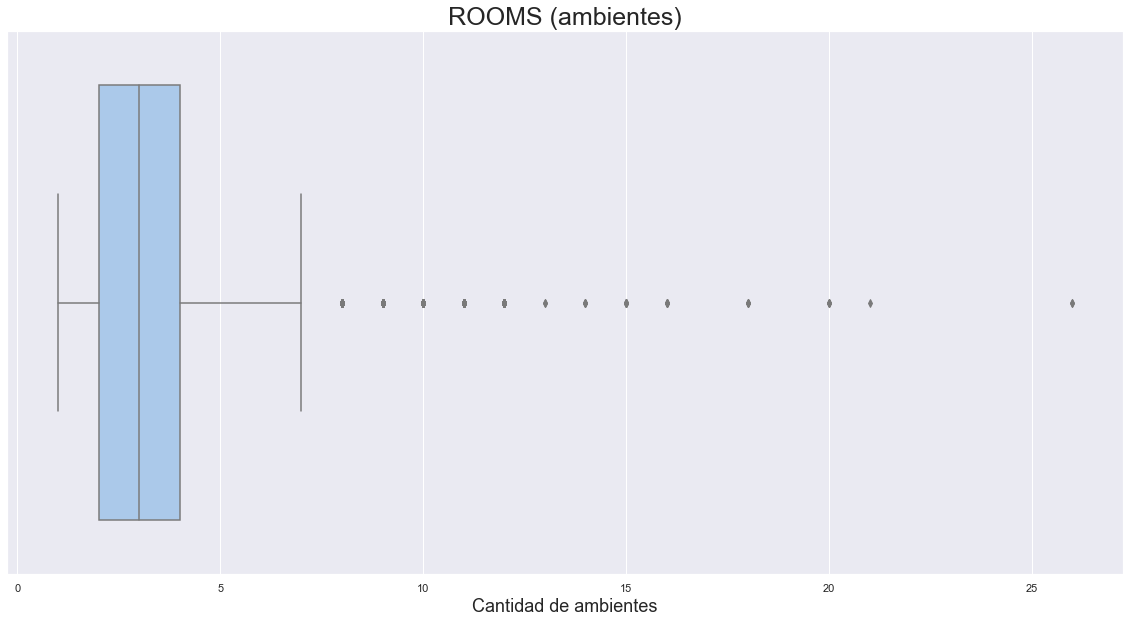

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'rooms', palette="pastel")
plt.xlabel('Cantidad de ambientes', fontsize=18)
plt.title('ROOMS (ambientes)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


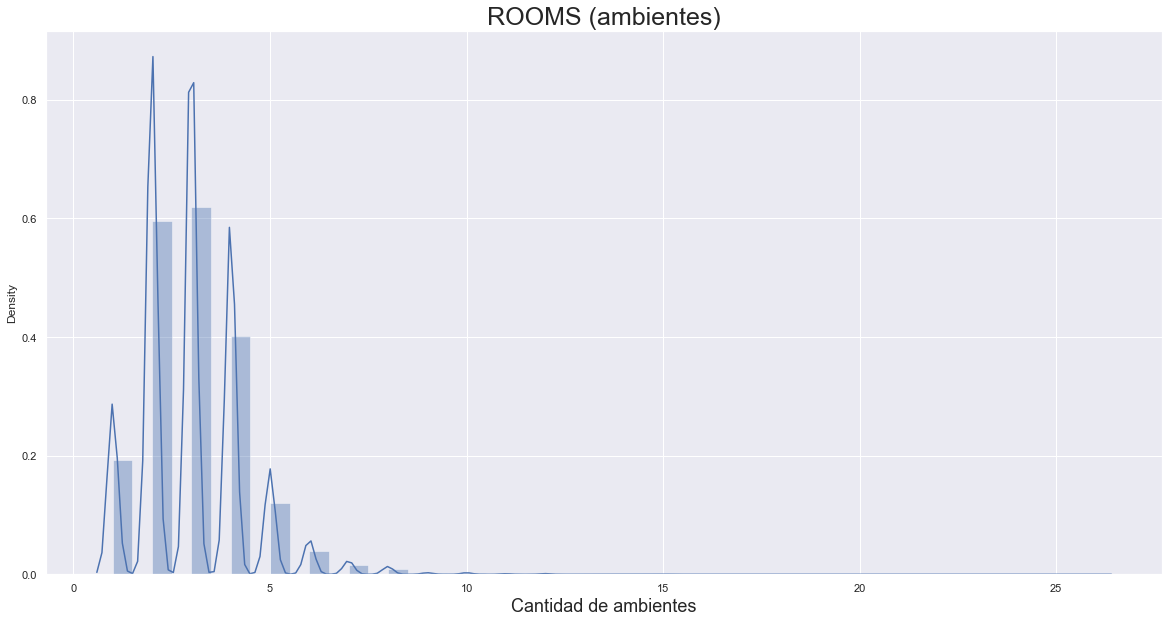

In [29]:
plt.figure(figsize=(20,10))
sns.distplot(data['rooms'].values)
plt.xlabel('Cantidad de ambientes', fontsize=18)
plt.title('ROOMS (ambientes)', fontsize=25)
plt.show()

In [30]:
data['rooms'].describe()

count    91485.000000
mean         2.964278
std          1.314704
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64

##### La variable estudiada no sigue una relación de distribución uniforme suficiente como para aplicar la regla de las 3 sigmas, por lo que aplicaremos la técnica del *rango intercuartilico* para detectar los valores atípicos

In [31]:
q25,q75 = np.percentile(data.rooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

2.0 4.0 2.0 -1.0 7.0


In [32]:
mascara_rooms = (data.rooms < minimo) | (data.rooms > maximo)
mascara_rooms.sum()

658

In [33]:
data = data.drop(data[data['rooms']>maximo].index)

##### Vemos que hemos ya podido haber eliminado 658 instancias a raíz de este estudio. Sugerimos prestar atención a que el valor mínimo impreso anteriormente es negativo. A razón de ello es que no lo hacemos *operar* sobre un supuesto dropeo por la sensilla razón de que no existen (y no deberian) existir valores negativos para esta feature en nuestro dataset. No hay razón real logica para que una propiedad tenga -1 ambiente. Asimismo apreciamos que el valor mas bajo al respecto es de 1 *room*

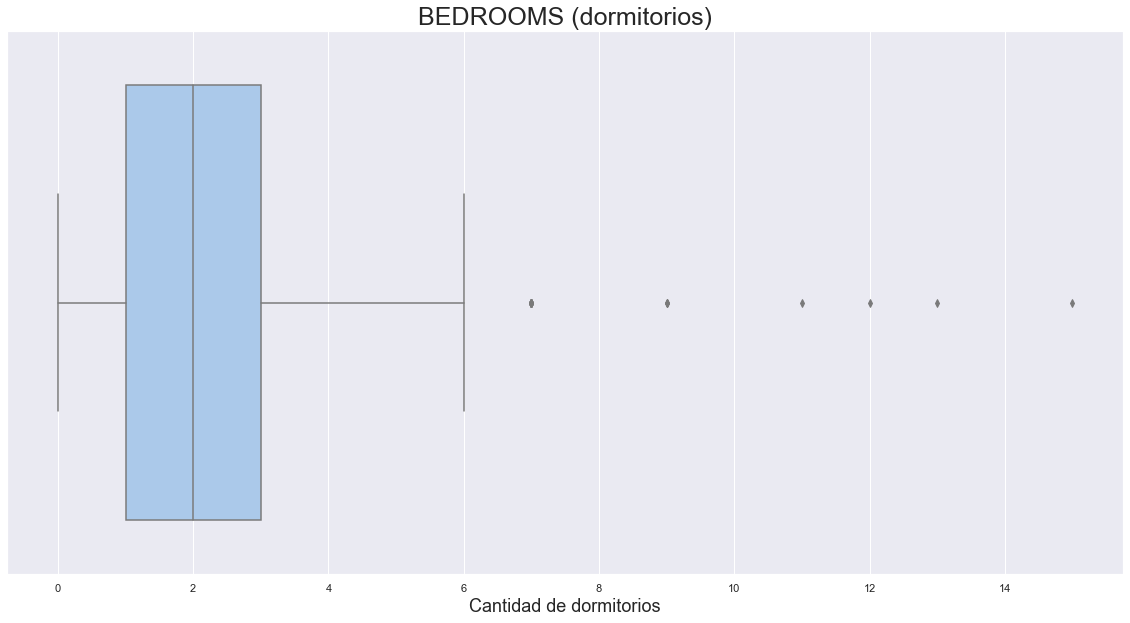

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'bedrooms', palette="pastel")
plt.xlabel('Cantidad de dormitorios', fontsize=18)
plt.title('BEDROOMS (dormitorios)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


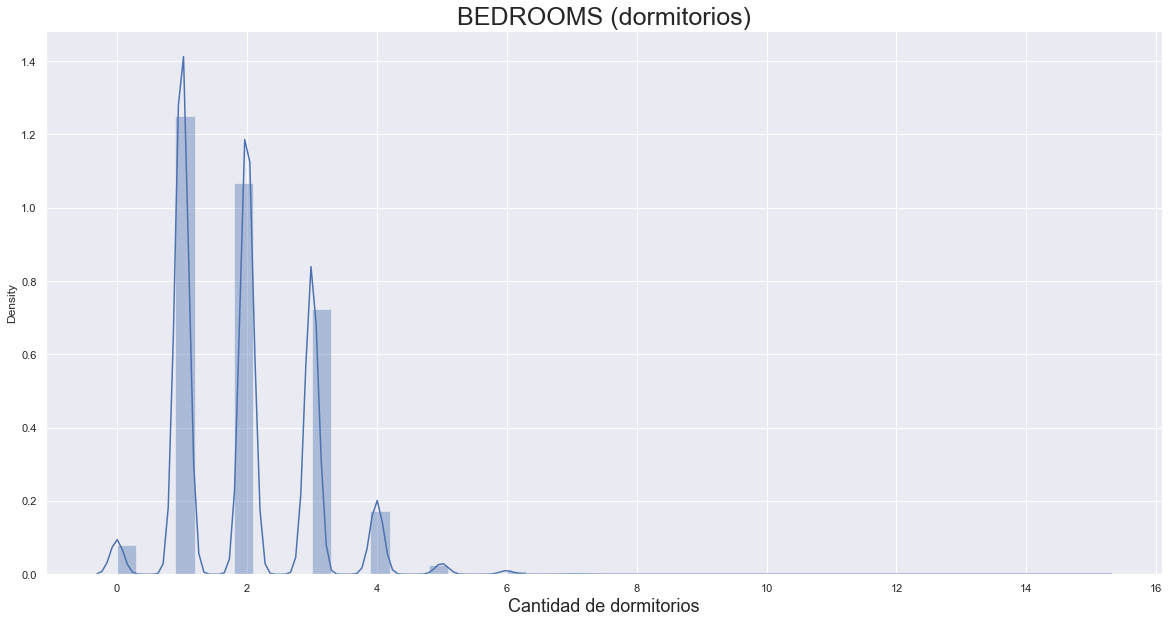

In [35]:
plt.figure(figsize=(20,10))
sns.distplot(data['bedrooms'].values)
plt.xlabel('Cantidad de dormitorios', fontsize=18)
plt.title('BEDROOMS (dormitorios)', fontsize=25)
plt.show()

In [36]:
data['bedrooms'].describe()

count    90827.000000
mean         1.931981
std          1.006857
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64

In [37]:
q25,q75 = np.percentile(data.bedrooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

1.0 3.0 2.0 -2.0 6.0


In [38]:
mascara_bedrooms = (data.bedrooms < minimo) | (data.bedrooms > maximo)
mascara_bedrooms.sum()

20

In [39]:
data = data.drop(data[data['bedrooms']>maximo].index)

##### Repetimos lo dicho anteriormente para el caso del 'minimo'

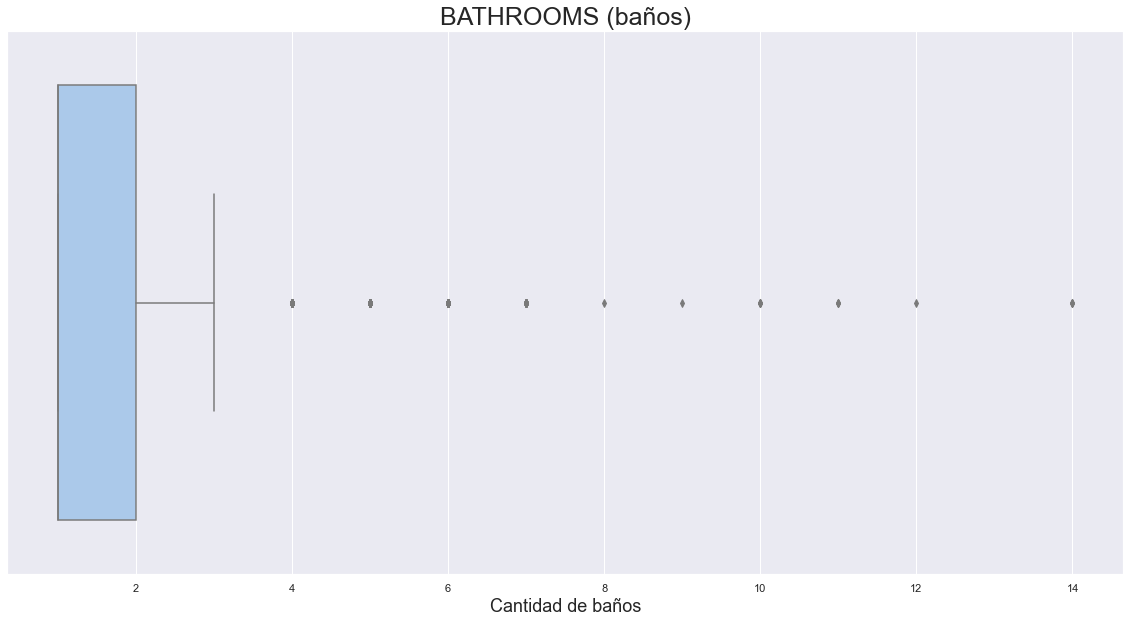

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'bathrooms', palette="pastel")
plt.xlabel('Cantidad de baños', fontsize=18)
plt.title('BATHROOMS (baños)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


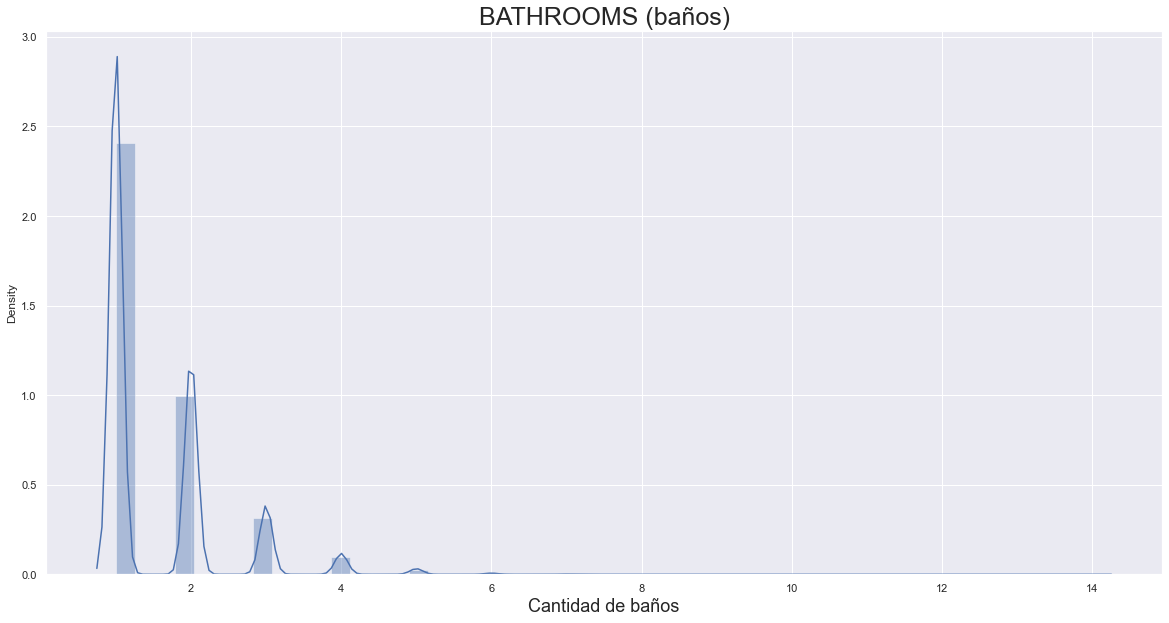

In [41]:
plt.figure(figsize=(20,10))
sns.distplot(data['bathrooms'].values)
plt.xlabel('Cantidad de baños', fontsize=18)
plt.title('BATHROOMS (baños)', fontsize=25)
plt.show()

In [42]:
data['bathrooms'].describe()

count    90807.000000
mean         1.532844
std          0.830103
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

In [43]:
q25,q75 = np.percentile(data.bathrooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

1.0 2.0 1.0 -0.5 3.5


In [44]:
mascara_bedrooms = (data.bedrooms < minimo) | (data.bedrooms > maximo)
mascara_bedrooms.sum()

5646

In [45]:
data = data.drop(data[data['bathrooms']>maximo].index)

##### Idem los dos *'dropeos'* previos no tiene sentido eliminar por 1/2 baño NEGATIVO.
##### Seguimos con 'surface_total'

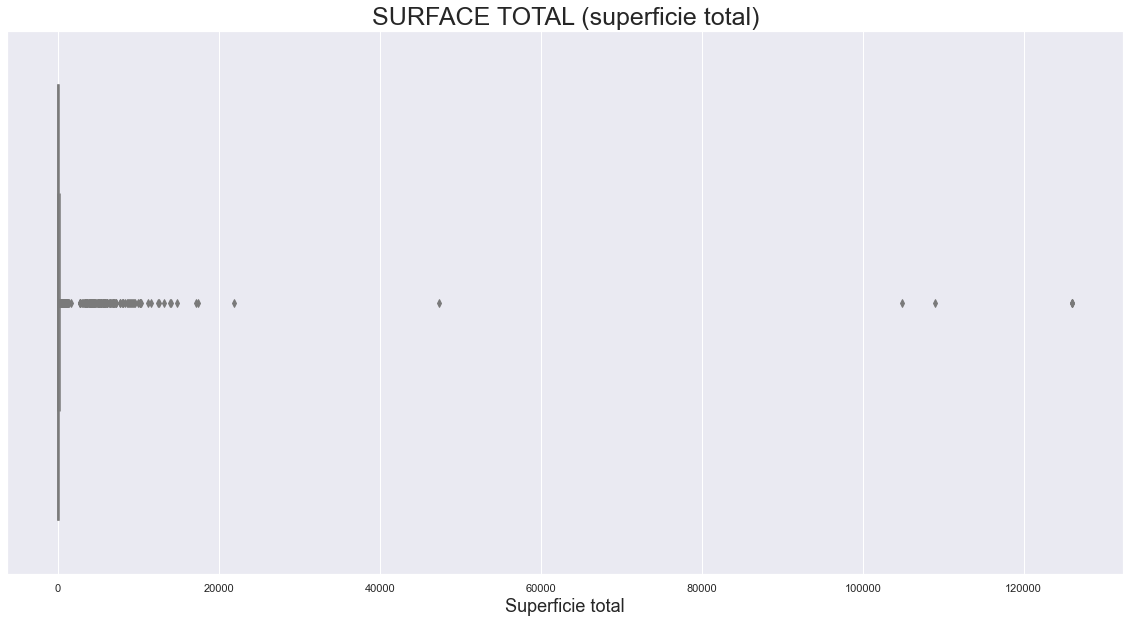

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'surface_total', palette="pastel")
plt.xlabel('Superficie total', fontsize=18)
plt.title('SURFACE TOTAL (superficie total)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


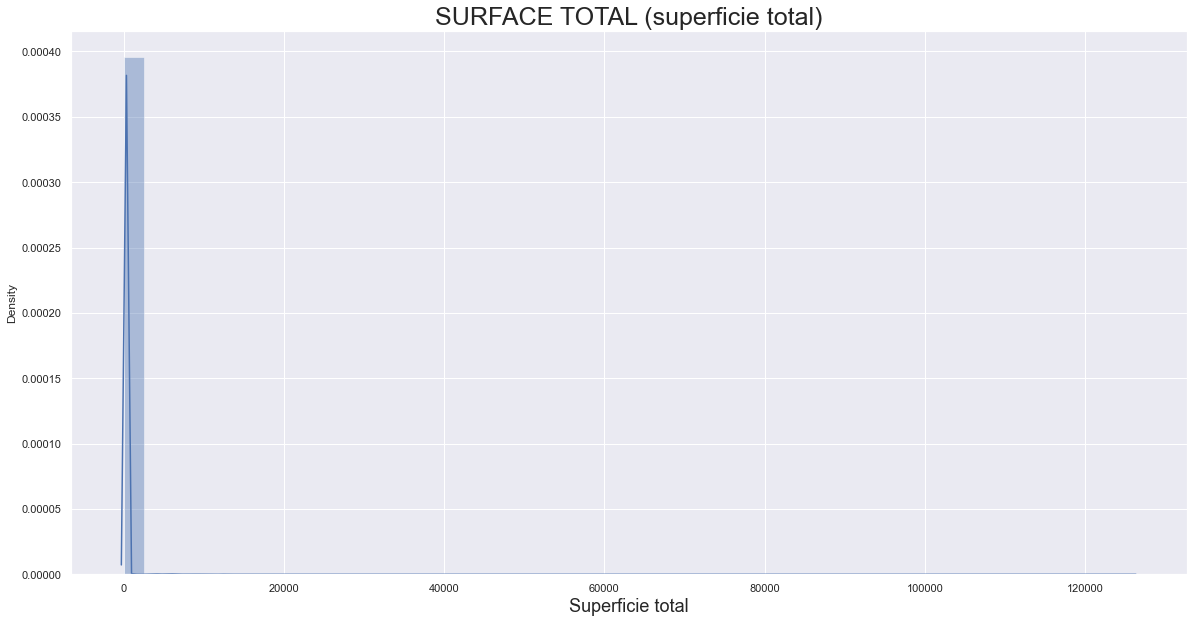

In [47]:
plt.figure(figsize=(20,10))
sns.distplot(data['surface_total'].values)
plt.xlabel('Superficie total', fontsize=18)
plt.title('SURFACE TOTAL (superficie total)', fontsize=25)
plt.show()

In [48]:
data['surface_total'].describe()

count     87797.000000
mean        116.720353
std         950.578762
min          10.000000
25%          50.000000
50%          74.000000
75%         128.000000
max      126062.000000
Name: surface_total, dtype: float64

In [49]:
q25,q75 = np.percentile(data.surface_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

50.0 128.0 78.0 -67.0 245.0


In [50]:
mascara_total = (data.surface_total < minimo) | (data.surface_total > maximo)
mascara_total.sum()

2820

In [51]:
data = data.drop(data[data['surface_total']>maximo].index)

##### Antes de ir a evaluar la variable que 'sigue' en flujo del trabajo, nos detendremos a ver nuevamente el mínimo, pero no de nuestros cálculos matemáticos sino el valor mínimo de nuestro dataset que es de 10 (mt2) si aplicáramos lo calculado por IQR no deberiamos eliminarlo, pero sabemos que por el código urbano de CABA actualmente no se permiten propiedades sino de hasta 18(mt2) como mínimo. Forzaremos a nuestros datos a cumplir con ese piso establecido por la normativa. Por lo tanto:

In [52]:
data = data.drop(data[data['surface_total']<18].index)

##### Ahora si vamos con 'surface_covered'

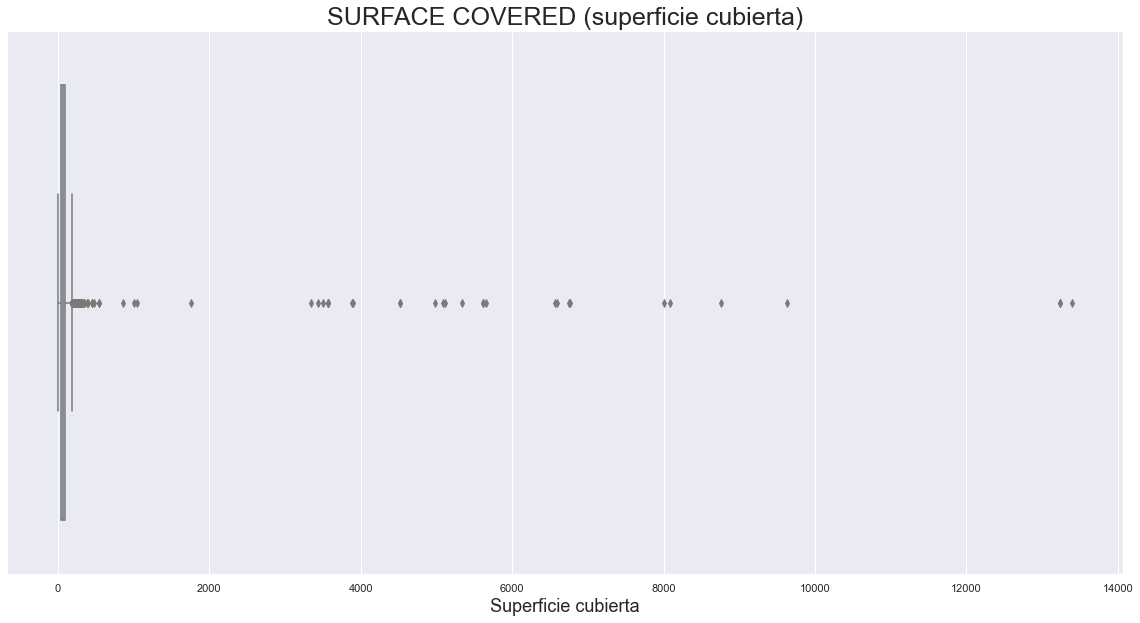

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'surface_covered', palette="pastel")
plt.xlabel('Superficie cubierta', fontsize=18)
plt.title('SURFACE COVERED (superficie cubierta)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


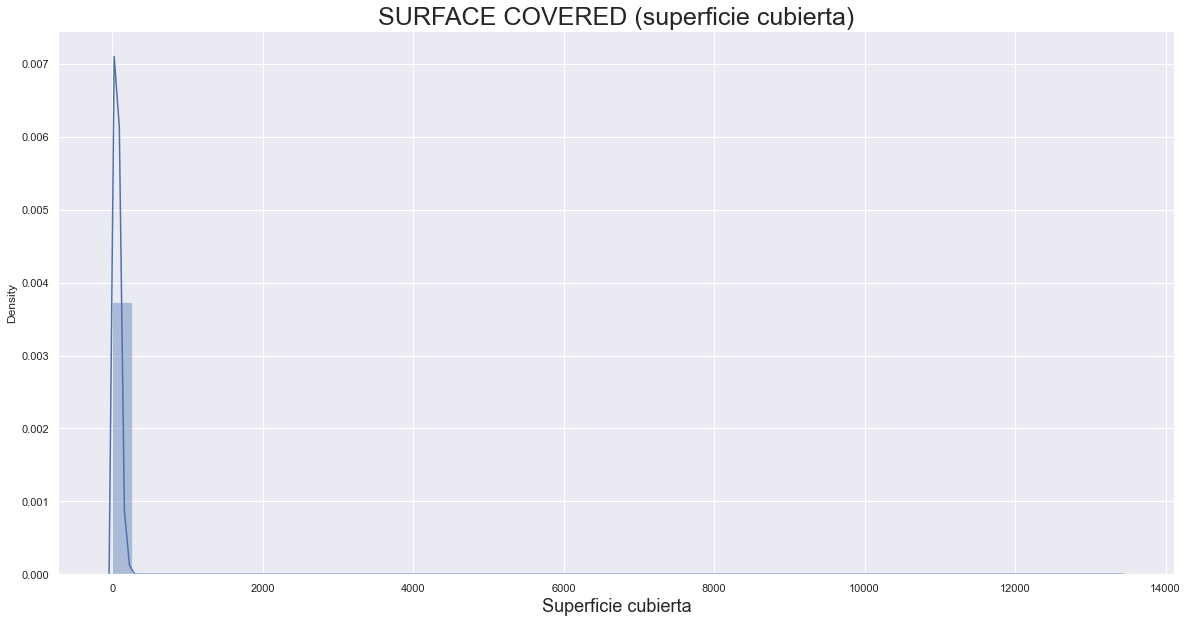

In [54]:
plt.figure(figsize=(20,10))
sns.distplot(data['surface_covered'].values)
plt.xlabel('Superficie cubierta', fontsize=18)
plt.title('SURFACE COVERED (superficie cubierta)', fontsize=25)
plt.show()

In [55]:
data['surface_covered'].describe()

count    84920.000000
mean        76.805040
std        131.285115
min          1.000000
25%         45.000000
50%         65.000000
75%        101.000000
max      13402.000000
Name: surface_covered, dtype: float64

In [56]:
q25,q75 = np.percentile(data.surface_covered.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

45.0 101.0 56.0 -39.0 185.0


In [57]:
mascara_total = (data.surface_covered < minimo) | (data.surface_covered > maximo)
mascara_total.sum()

1318

In [58]:
data = data.drop(data[data['surface_covered']>maximo].index)

##### Repetimos la logica de lo anterior, pero volveremos sobre algo que se analizó para el proyecto 1. Nuestra superficie cubierta no deberia ser mayor a nuestra superficie total, por lo que aplicaremos un nuevo filtrado sobre esto

In [59]:
data = data.drop(data[data['surface_covered']>data['surface_total']].index)

##### Para finalizar, analizaremos los valores de nuestro feature 'y': 'price'

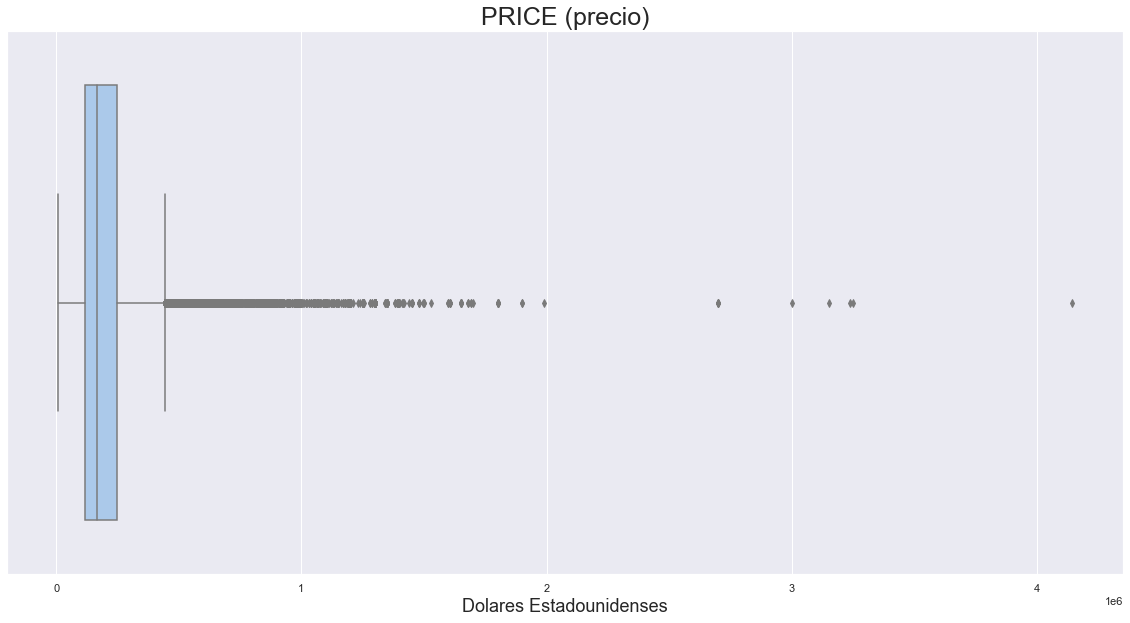

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data, x = 'price', palette="pastel")
plt.xlabel('Dolares Estadounidenses', fontsize=18)
plt.title('PRICE (precio)', fontsize=25)
plt.show()

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


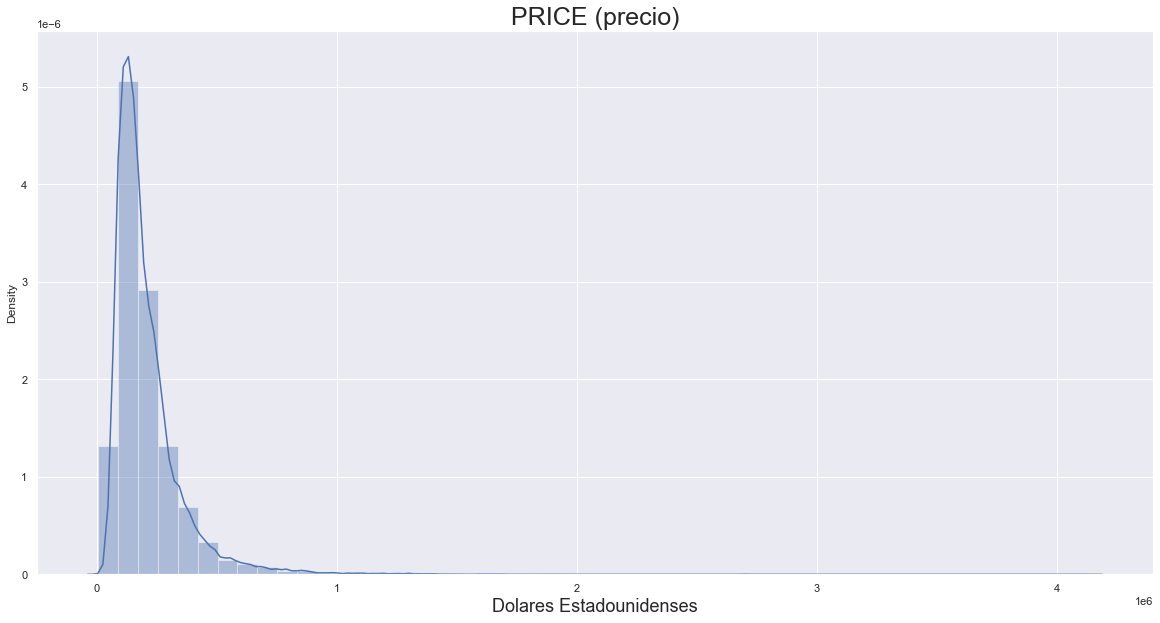

In [61]:
plt.figure(figsize=(20,10))
sns.distplot(data['price'].values)
plt.xlabel('Dolares Estadounidenses', fontsize=18)
plt.title('PRICE (precio)', fontsize=25)
plt.show()

In [62]:
print('El precio minimo de propiedad es de:', np.min(data.price))
print('El precio maximo de propiedad es de:', np.max(data.price))
print('El promedio de precio es de:', data.price.mean())
print('La moda de precio es de:', stat.mode(data.price))
data['price'].describe()

El precio minimo de propiedad es de: 7500.0
El precio maximo de propiedad es de: 4144561.0
El promedio de precio es de: 206660.85806771702
La moda de precio es de: 125000.0


count    8.263800e+04
mean     2.066609e+05
std      1.456524e+05
min      7.500000e+03
25%      1.190000e+05
50%      1.669000e+05
75%      2.490000e+05
max      4.144561e+06
Name: price, dtype: float64

In [63]:
q25,q75 = np.percentile(data.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

119000.0 249000.0 130000.0 -76000.0 444000.0


In [64]:
mascara_total = (data.price < minimo) | (data.price > maximo)
mascara_total.sum()

4684

In [65]:
data = data.drop(data[data['price']>maximo].index)

##### Segun la información conseguida en el sitio https://buenosaires.gob.ar y google el valor mínimo en el que se puede conseguir una propiedad en CABA oscila en los 25.000 dolares estadounidenses. Para hacer el esfuerzo por contemplar distintas realidades de mercado imputaremos este valor arbitrariamente a 20.000 dolares estadounidenses.

In [66]:
data = data.drop(data[data['price']<20000].index)

In [67]:
data.shape

(77946, 8)

##### Antes de seguir con un ítem solicitado para esta parte del proyecto (el de entrenar nuestro modelo del proyecto 1 pero con este dataset) es necesario escalar los datos; se destaca que crearemos nuevas features a partir de nuestra variable 'property_type' para que nuestros modelos trabajen mejor con estas variables categóricas. Nos haremos del método get_dummies() de pandas, concatenando cada variable como una feature distinta

In [68]:
dummies = pd.get_dummies(data['property_type'])

data = pd.concat([data, dummies], axis=1)
data

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Casa,Departamento,PH
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,0,1,0
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento,0,1,0
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento,0,1,0
21,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento,0,1,0
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Departamento,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
146178,Palermo,3.0,2.0,3.0,154.0,154.0,385000.0,PH,0,0,1
146440,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,PH,0,0,1
146441,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,PH,0,0,1
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH,0,0,1


In [69]:
data = data.drop(['property_type', 'l3'], axis=1)
data

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
11,2.0,1.0,1.0,68.0,59.0,149000.0,0,1,0
12,2.0,1.0,1.0,50.0,44.0,115000.0,0,1,0
20,2.0,1.0,1.0,31.0,31.0,75000.0,0,1,0
21,1.0,1.0,1.0,22.0,22.0,48000.0,0,1,0
22,2.0,1.0,1.0,45.0,45.0,95000.0,0,1,0
...,...,...,...,...,...,...,...,...,...
146178,3.0,2.0,3.0,154.0,154.0,385000.0,0,0,1
146440,2.0,1.0,1.0,40.0,40.0,130000.0,0,0,1
146441,2.0,1.0,1.0,40.0,40.0,130000.0,0,0,1
146549,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,1


##### Habiendo *dropeado* nuestra variable original 'property_values' ahora sigue separar los datos en nuestros conjuntos de entradas y salidas, o **'X'** e **'y'**. Luego de eso escalaremos nuestros datos

In [169]:
X = data.drop('price', axis=1)
y = data.price

In [170]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

##### Separeremos nuestros datos en conjuntos de entrenamiento y prueba, en este caso con idéntico 'test_size' que para nuestro primer proyecto. Acto seguido instanciaremos los modelos del proyecto 1 con idénticos hiperparámetros para cotejar sus desempeños ahora si con este dataset.

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape

(54562, 8)

In [172]:
X_train

array([[ 0.29170693,  0.27826804,  1.16874359, ...,  8.03124152,
        -2.67648921, -0.34656445],
       [ 1.26102904,  1.40912732, -0.60319463, ..., -0.12451375,
         0.37362377, -0.34656445],
       [ 0.29170693,  0.27826804, -0.60319463, ..., -0.12451375,
         0.37362377, -0.34656445],
       ...,
       [ 0.29170693,  0.27826804,  1.16874359, ..., -0.12451375,
         0.37362377, -0.34656445],
       [-0.67761517, -0.85259124, -0.60319463, ..., -0.12451375,
         0.37362377, -0.34656445],
       [ 0.29170693,  0.27826804,  1.16874359, ..., -0.12451375,
        -2.67648921,  2.88546622]])

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree = DecisionTreeRegressor(max_depth=12)
knn = KNeighborsRegressor(n_neighbors=5)

linear_model.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 58370.500535287356
Raíz del error cuadrático medio en Test: 57963.62758484415


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


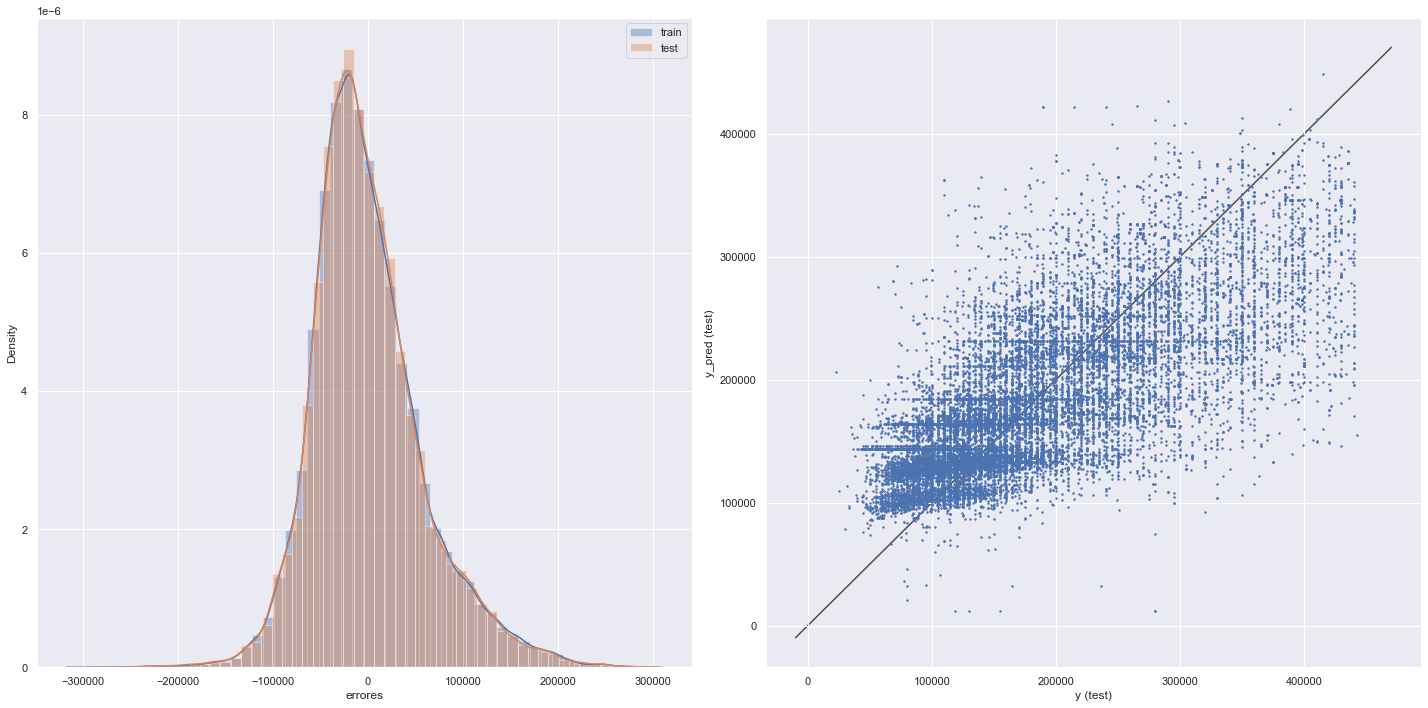

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 43164.88538130875
Raíz del error cuadrático medio en Test: 46848.25825826292


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


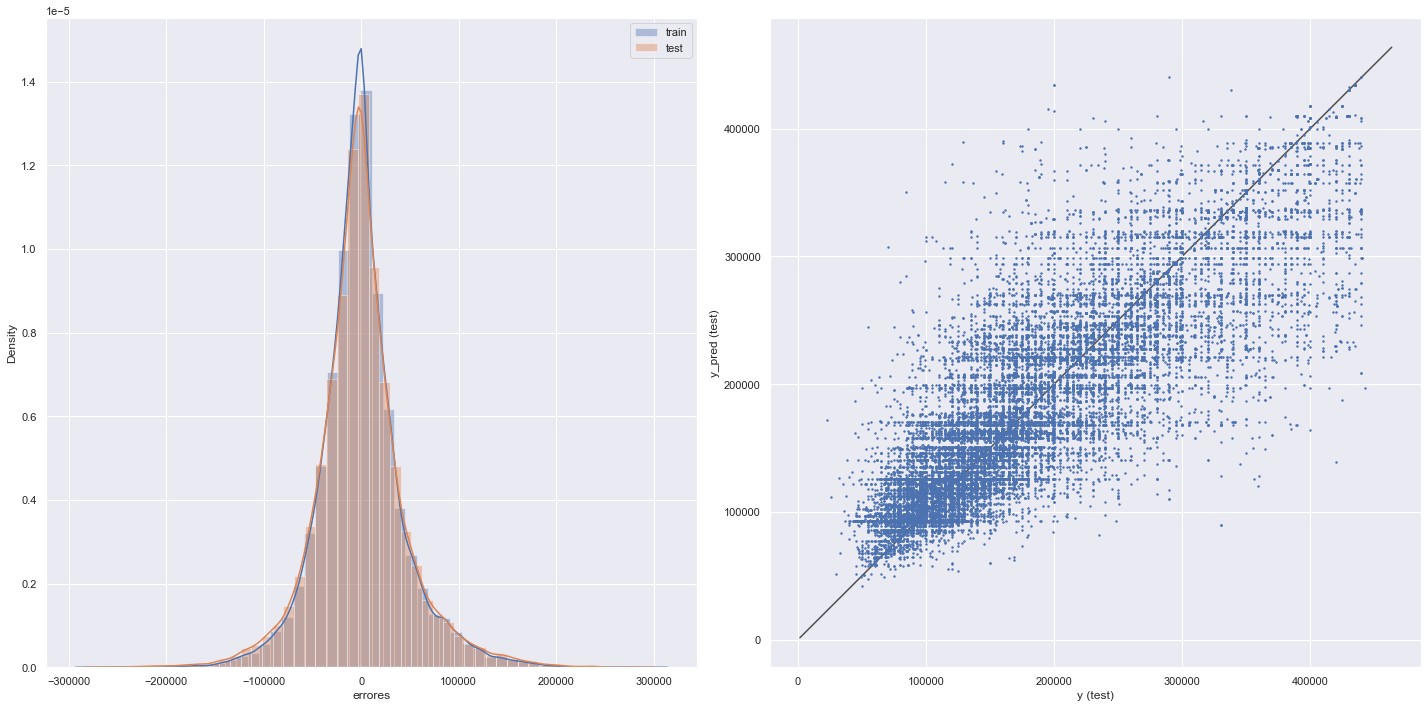

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 41954.97884291769
Raíz del error cuadrático medio en Test: 46710.42026735089


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


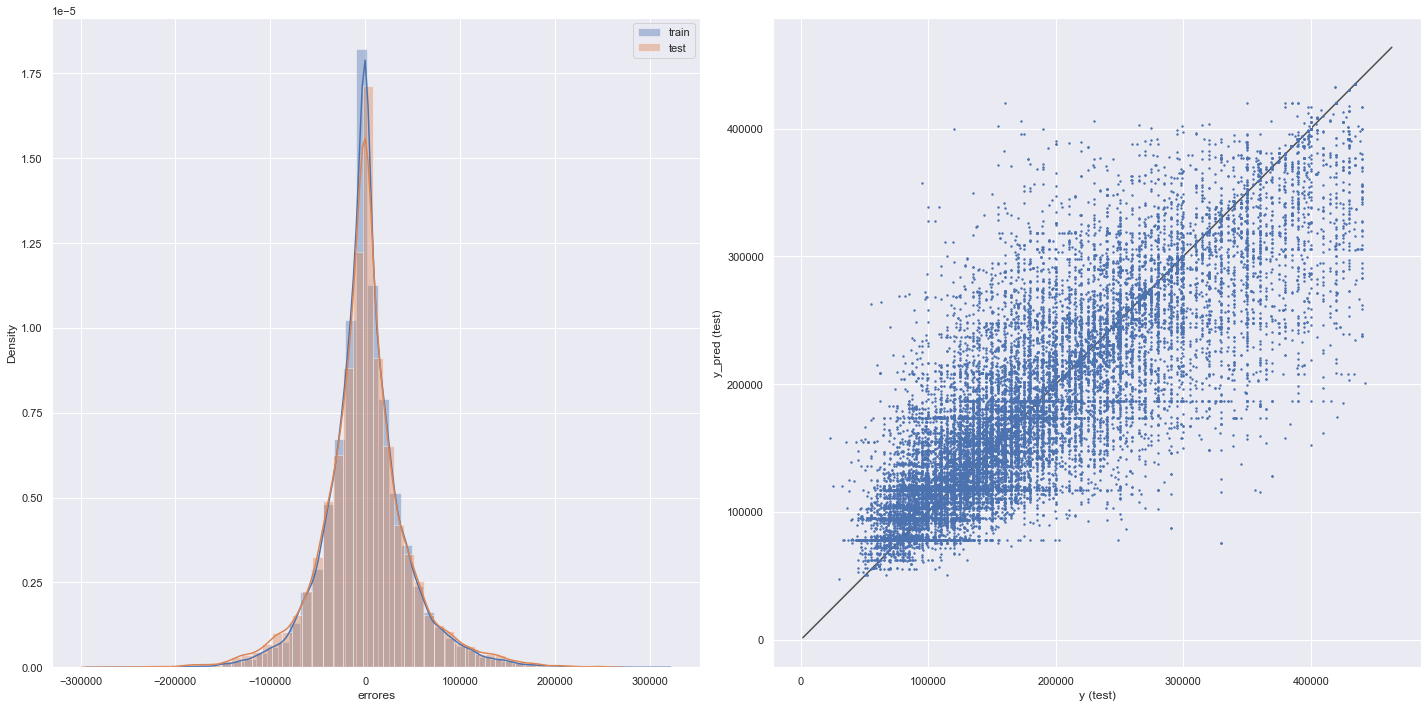

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree, knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

##### Estos son los resultados obtenidos con los mismos modelos con nuestro dataset del proyecto 1 (**sin implementación de ingienería de features**):
##### Modelo: Regresión lineal, Raíz del error cuadrático medio en Train: 201591.33653917952, Raíz del error cuadrático medio en Test: 196662.24313943548
##### Modelo: Árbol de Decisión, Raíz del error cuadrático medio en Train: 99911.3335106373, Raíz del error cuadrático medio en Test: 142757.43583809512
##### Modelo: Vecinos más cercanos, Raíz del error cuadrático medio en Train: 122643.80927514686, Raíz del error cuadrático medio en Test: 150515.79132593446
##### A simple vista vemos como el desempeño, en este caso medido en RMSE, es sumamente superador al aplicar una correcta ingienería de feature a nuestro dataset. La integración de datos en los casos de valores faltantes en vez de simplemente eliminar estas instancias, el corregir las mediciones apuntando a valores que no sean outliers, el convertir variables categóricas pertinentes para nuestros regresores a variables *dummies*, el escalado de nuestros datos son sin lugar a dudas extremadamente importantes en este punto. Se concluye asi que la labor fue óptima.

## Parte 'B'

##### En este segmento instanciaremos una serie de modelos sobre nuestro dataset trabajado. A tal fin optaremos por trabajar con regresores Ridge y Lasso, asi como con un 'Random Forest' y un regresor 'XGBOOST'. Haremos validación cruzada de nuestros datos y nos serviremos selectivamente de las herramientras de 'random search' y 'grid search' para la optimización de los hiper parámetros. 
##### En los casos de Ridge y Lasso instanciaremos una seria transformación de nuestro dataset mediante el uso de *'PolynomialFeatures'* que incorpora atributos polinómicos con el fin de 'afinar' los regresores, recordando siempre que estos dos utilizan regularización para evitar el sobre ajuste. Al respecto colocaremos un *degree* de 4 para evitar que nuestras X cambien considerablemente su dimensión y esto repercuta en los tiempos de operación a la hora del entrenamiento de los modelos. Matemáticamente existen argumentos para sostener este *degree 4* por el comportamiento de las curvas, recordando sin embargo que esta incorporación de *polynomial features* trae como aparejado el riesgo de sobre ajustar los modelos con los cuales se trabaje. Se estima que tan solo 10 variables pueden producir un sobre ajuste.
##### Respecto a los hiperparámetros optados para instanciar los *random searchers* en busqueda de lograr una optimización adecuada se optó en Ridge (L2) por *alpha* que no es más que un hiperparámetro que balancea entre minimizar el error del regresor y lograr buenos coeficientes destacando que si vale 0 instancea una simple regresión lineal, y ante altos valores tiene a 'underfittear', dicho de otro modo seria que los modelos asi generados con un alpha 'alta' reducen su complejidad. Su regularización está atravezada por una penalización equivalente al cuadrado de la magnitud de los coeficientes. Por otra parte se utilizará el hiperparámetro *'solver'* para las rutinas computacionales, tanto en auto para que el algoritmo se ajute al tipo de dato y *SVD* que utiliza una descomposición de valores singulares de X
##### En el caso de Lasso (L1) *alpha* trabaja de una manera similar, pero su forma de operar difiere en el sentido de que agrega un factor de suma para el valor absoluto en la busqueda de los coeficientes. Por otra parte se utilizará el hiperparámetro *'selection'* para que el entrenamiento difiera los resultados entre conseguir un coeficiente al recorrer todas las instancias (cyclic) o bien que se actualice a cada iteración.

In [108]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
lasso = Lasso()

poly = PolynomialFeatures(degree = 4, include_bias=False) 
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

param_ridge = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
              'solver': ['auto', 'svd']}
param_lasso = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
              'selection': ['cyclic', 'random']}

##### Cotejaremos como varió la dimensión de nuestras X

In [109]:
X_train_new.shape

(54562, 494)

##### Instanciaremos un random serch de 10 iteraciones y 5 cross validation para cada uno de nuestros regresores con regularización. Seguiremos entrenando en un proceso que demorará algunos minutos

In [110]:
reg_ridge = RandomizedSearchCV(ridge, param_ridge, refit = True, n_iter=10, random_state=1, cv=5)

reg_lasso = RandomizedSearchCV(lasso, param_lasso, refit = True, n_iter=10, random_state=1, cv=5)

In [111]:
reg_ridge.fit(X_train_new, y_train)
reg_lasso.fit(X_train_new, y_train)

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53347764107500.82, tolerance: 31759396255.969227
  model = cd_fast.enet_coordinate_descent(
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54016304587382.53, tolerance: 31680602442.545975
  model = cd_fast.enet_coordinate_descent(
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54007840222375.07, tolerance: 31798530541.033775
  model = cd_fast.enet_coordinate_descent(
/Applications/miniconda3/

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1,
                                                  0.5, 1],
                                        'selection': ['cyclic', 'random']},
                   random_state=1)

##### Evaluaremos cuáles son los mejores parámetros que nuestro trabajo con *RandomizedSearchCV* encuentra. Posterior a eso instanciaremos nuestros modelos con esas 'recomendaciones' y veremos los coeficientes obtenidos para finalmente evaluar sus resultados con el propósito de cotejar esos resultados en errores respecto a nuestros anteriores modelos.

In [112]:
print("Mejores parametros: "+str(reg_ridge.best_params_))

print("Mejores parametros: "+str(reg_lasso.best_params_))

Mejores parametros: {'solver': 'svd', 'alpha': 1}
Mejores parametros: {'selection': 'cyclic', 'alpha': 1}


In [113]:
ridge_reg = Ridge(solver = 'svd', alpha = 1)
ridge_reg.fit(X_train_new, y_train)
print(f'Pendientes: {ridge_reg.coef_}')
print(f'Ordenada: {ridge_reg.intercept_}')

lasso_reg = Lasso(selection = 'cyclic', alpha = 1)
lasso_reg.fit(X_train_new, y_train)
print(f'Pendientes: {lasso_reg.coef_}')
print(f'Ordenada: {lasso_reg.intercept_}')


Pendientes: [ 4.81842546e+03 -1.34875509e+04  6.93017065e+03  4.43738447e+04
  2.92695221e+04 -1.97328737e-02  1.03077853e+01 -1.09147532e+01
 -7.07057189e+03  7.28101463e+03  1.44403006e+03  1.13015986e+04
  6.78222874e+03 -5.99474760e+02  1.77906551e+03 -1.64760934e+03
 -2.25159795e+03  2.08680256e+02  1.04662172e+04 -1.69996190e+04
  1.67894069e+03 -5.00795307e+03  4.64129747e+03  3.15894010e+03
 -1.26622774e+04  1.65545773e+03 -8.62838399e+02  2.56456814e+03
 -2.37559371e+03 -8.14521161e+04  8.17288158e+04 -5.52298964e+03
  1.64307049e+04 -1.52219840e+04 -3.06511932e+04 -3.64291246e+03
  1.08143762e+04 -1.00157336e+04 -1.56007586e-01 -1.23064988e+00
  1.36587623e+00 -2.37374416e+01  2.56409052e+01 -2.77114825e+01
 -1.54085991e+03  9.52415725e+03 -4.09827241e+03 -1.36091711e+04
  3.97469207e+03  7.83886826e+02 -2.73856435e+03  2.59125516e+03
 -6.80037768e+03 -1.47540684e+03 -1.38758482e+04  6.10789213e+03
 -9.01748707e+02  2.93709272e+03 -2.75491705e+03  2.77870014e+03
  2.61089034e

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66750756194280.5, tolerance: 39732874006.49878
  model = cd_fast.enet_coordinate_descent(


Modelo: Ridge Regressor
Raíz del error cuadrático medio en Train: 49538.61323673743
Raíz del error cuadrático medio en Test: 49753.86888940881


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


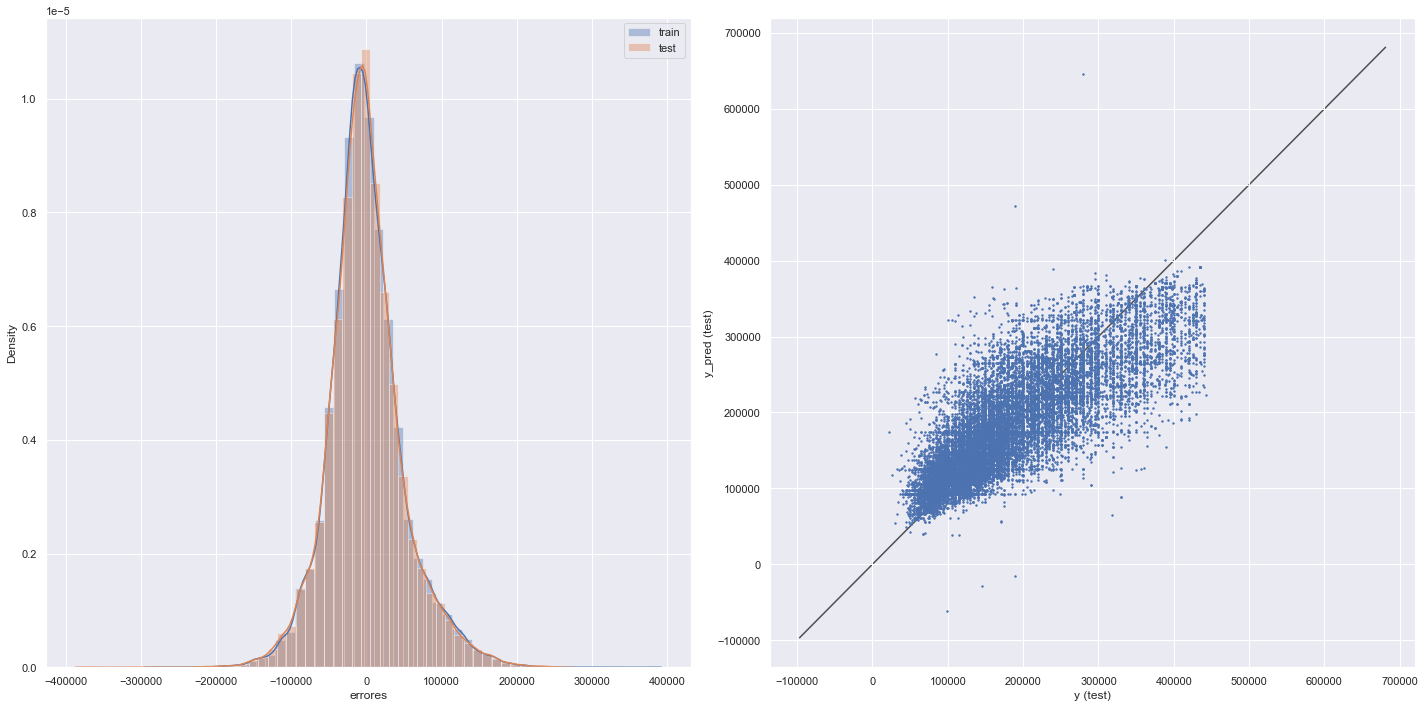

Modelo: Lasso Regressor
Raíz del error cuadrático medio en Train: 49667.90747824109
Raíz del error cuadrático medio en Test: 49745.29364749829


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


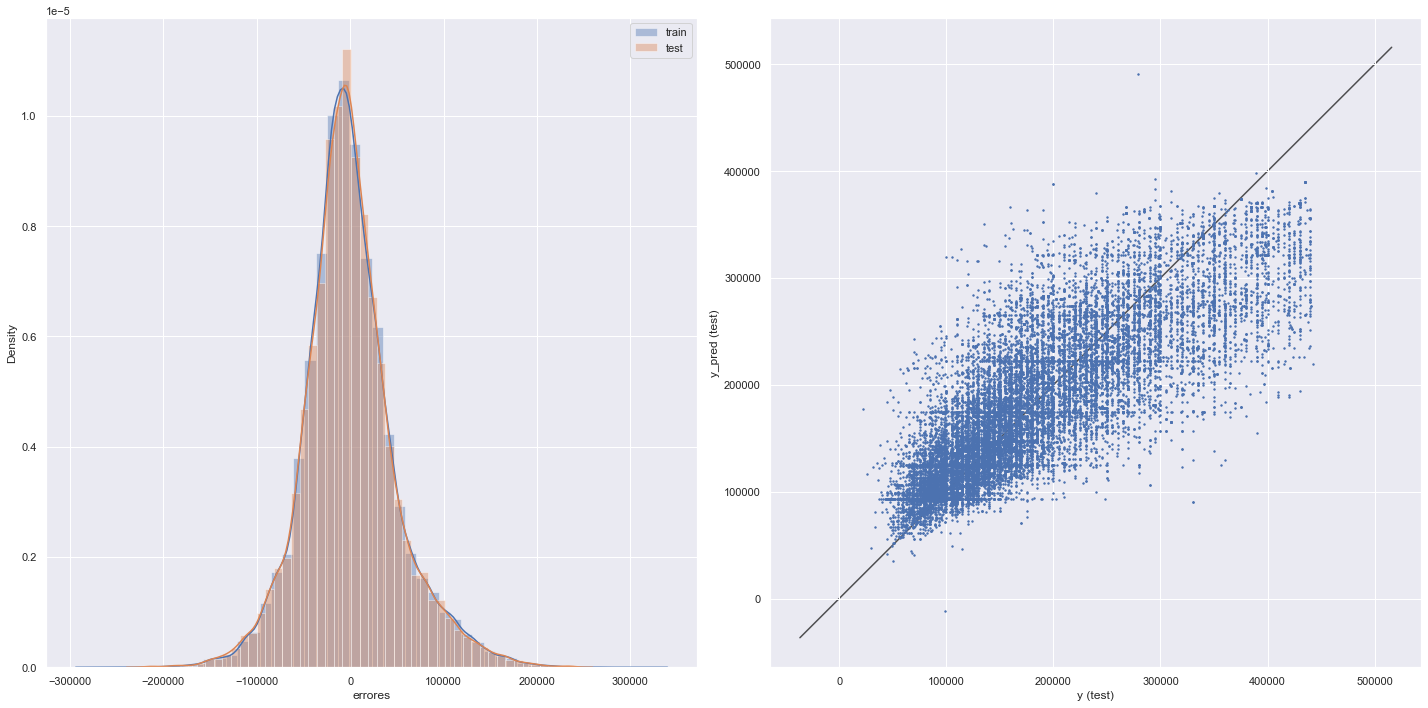

In [114]:
modelos = ['Ridge Regressor', 'Lasso Regressor']

for i, model in enumerate([ridge_reg, lasso_reg]):
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

##### Previo a instanciar un **random forest** y un **regresor xgboost** haremos algunas consideraciones de relevancia para los regresores Ridge y Lasso respecto a este trabajo.
##### En concreto no parecieran mejorar SUSTANCIALMENTE el proceso de aprendizaje y correcta salida de valores 'y' más que 'superando' únicamente a nuestra regresión lineal de la 'Parte A' de este proyecto la cual se modeló sin trabajo en modificación por atributos polinómicos. Si a esto le sumamos NECESARIAMENTE la consideración del costo operativo y computacional que tiene toda la labor no parecieran A PRIORI ser recomendables estos modelos frente a el árbol de desición y el knn modelados en nuestra primera parte; es importante destacar asimismo que tanto para el arbol como para el knn la desición de elección de hiperparámetros fue meramente manual e intuitiva (idénticas a las del proyecto 1), siendo que para Ridge y Lasso se utilizaron todas estas herramientas en total: modificación del dataset de valores X por atributos polinómicos, validación cruzada y optimización de hiperparámetros mediante *random search*. Pareciera ser demasiado esfuerzo para obtener modelos que en errores apenas superan a modelos más 'sencillos', dando en cierto punto por valedero el argumento de que más vale un modelo sencillo con una buena ingienería de features que un modelo complejo que no 'ajuste' correctamente. De todos modos se destaca que tanto para Ridge y Lasso vemos muchísima menos varianza entre los resultados de *test* y *train* que respecto a la regresión lineal, el árbol de desición y el knn.
##### Veremos qué sucede si trabajamos ahora con un **RANDOM FOREST** y un regresor **XGBOOST**
##### instanciaremos nuestro random forest con un *grid search* para determinar su hiperparámetro 'criterion', que mide la calidad de cada split sea via el error cuadrático medio o bien el error absoluto; asimismo haremos una validación cruzada con 5 folds.

In [115]:
from sklearn.ensemble import RandomForestRegressor

ran_forest = RandomForestRegressor()

param_forest = {'criterion':['mse', 'mae']}

reg_forest = GridSearchCV(ran_forest, param_grid = param_forest, refit = True, cv=5)

In [85]:
reg_forest.fit(X_train, y_train)

print("Mejores parametros: "+str(reg_forest.best_params_))

Mejores parametros: {'criterion': 'mse'}


##### La siguiente celda ejecuta dos modelos de random forest, la razón se explicará luego en las conslusiones y en vista a los resultados obtenidos.

In [136]:
ran_forest16 = RandomForestRegressor(n_estimators = 200, max_depth = 16)
ran_forest16.fit(X_train, y_train)

ran_forest = RandomForestRegressor(n_estimators = 200)
ran_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

##### Por último modelaremos un regresor 'XGBOOST' al cual ajustaremos manualmente su hiperparámetro de 'n_estimators' a 200. Posterior a eso graficarmeos y evaluaremos los 3 modelos.

In [137]:
import xgboost as xgb

from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=200)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Modelo: RANDOM FOREST max depth none
Raíz del error cuadrático medio en Train: 34283.257349791354
Raíz del error cuadrático medio en Test: 42874.61169818154


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


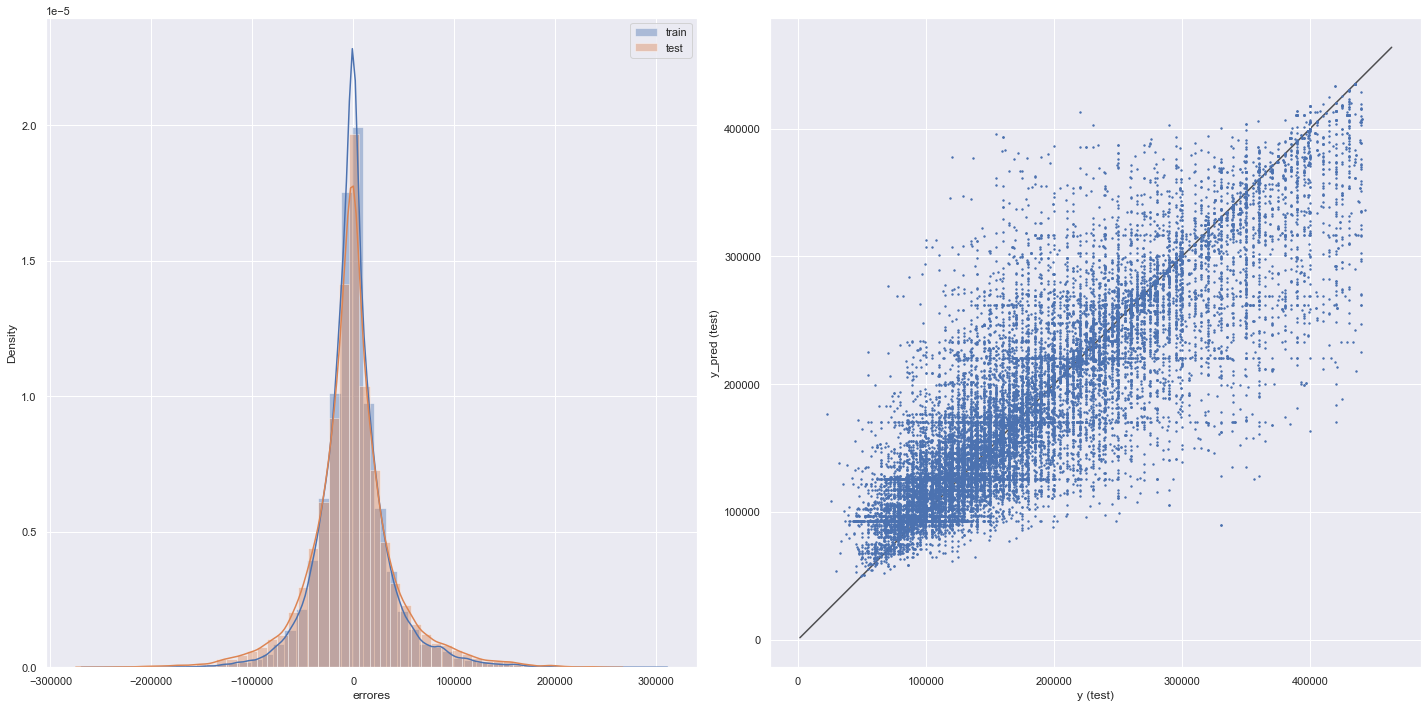

Modelo: RANDOM FOREST max depth 16
Raíz del error cuadrático medio en Train: 36771.46221735391
Raíz del error cuadrático medio en Test: 42763.269768378756


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


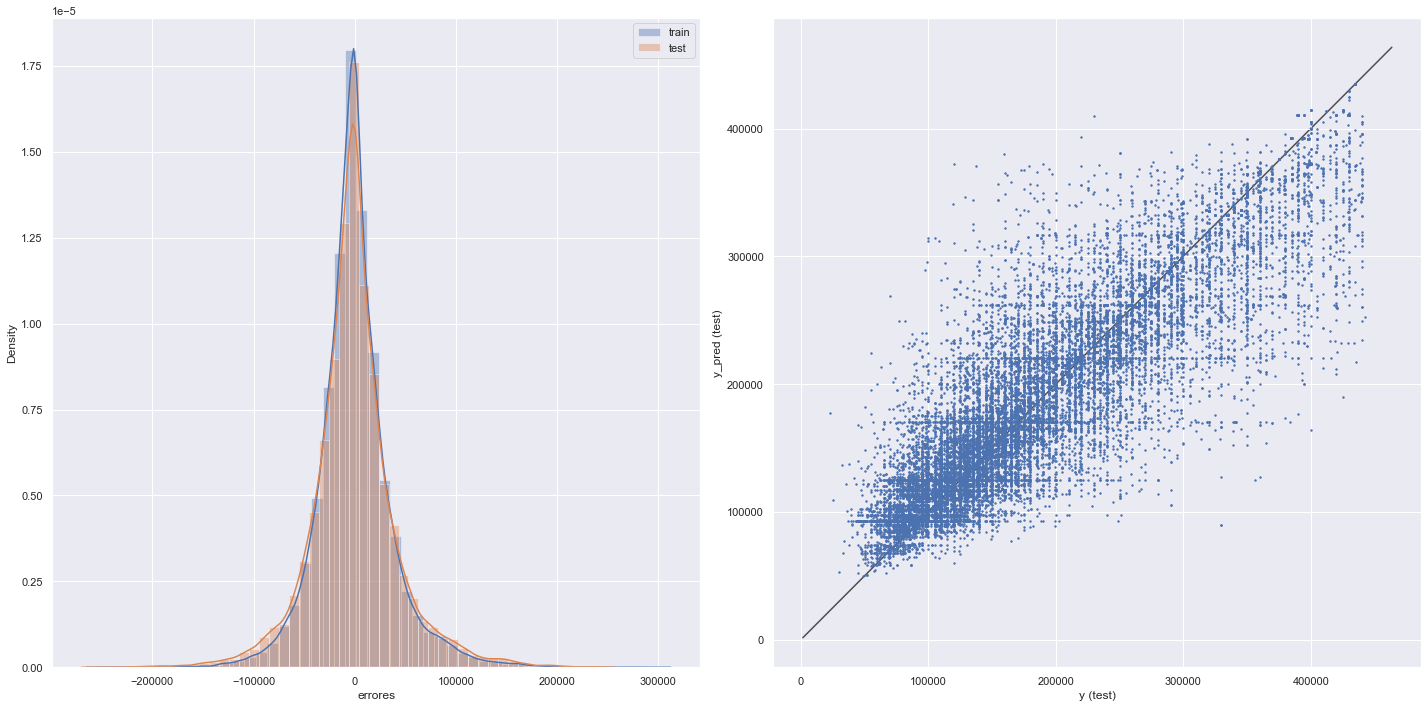

Modelo: XGBOOST
Raíz del error cuadrático medio en Train: 40129.85015160919
Raíz del error cuadrático medio en Test: 44173.61837023905


/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


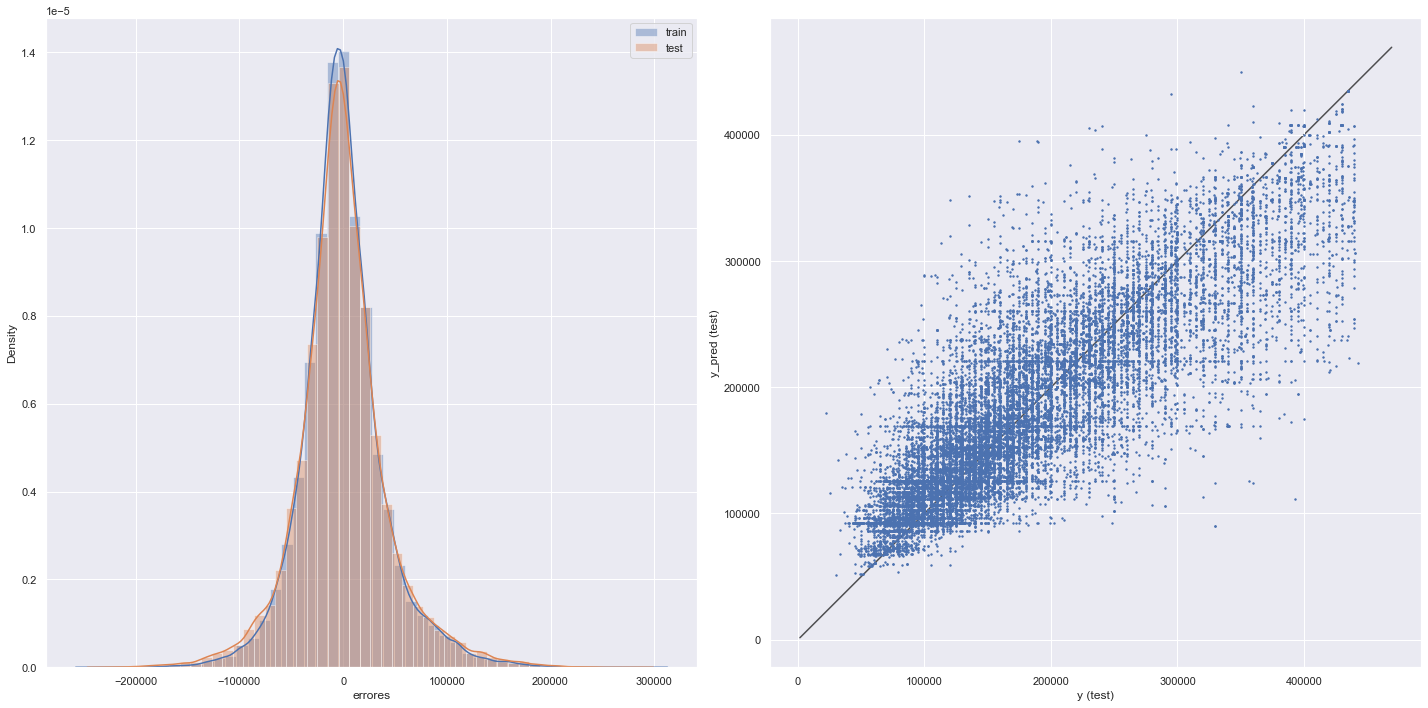

In [138]:
modelos = ['RANDOM FOREST max depth none', 'RANDOM FOREST max depth 16', 'XGBOOST']

for i, model in enumerate([ran_forest, ran_forest16, xgbr]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (20,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

##### BIEN! Se trabajó en este proyecto con 8 modelos en total. Remitimos dirigirse a la 'Parte A' para las conclusiones respecto a la regresión lineal, el árbol de desición y el KNN. Idéntico se sugiere para los regresores Ridge y Lasso hechos en esta parte.
##### Nos concentraremos en retomar las ideas expresadas anteriormente pero ahora con el fin de 'elegir' el mejor modelo para el problema que nos ocupa. El modelo XGBOOST muestra un excelente desempeño únicamente ajustando la cantidad de iteradores. Supera en rendimiento a los modelos de la parte A y a los regresores Ridge y Lasso. Es un algoritmo sumamente completo que modelado ofrece rápidamente excelentes resultados. Operativamente parece ser muy sólido y eficaz, opera en su seno validación cruzada, optimización de hiperparámetros; sumamente recomendable. Empero nuestro mejor modelo en este caso está entre los dos random forest. Sobra ver en este caso sus medición de errores cuadráticos medios para entender que entre ambos debemos decidir y justificar
##### Nuestro primer random forest se trata de uno instanciado con profunidad infinita. Nos otorga el mejor rendimiento obtenido en etapa de entrenamiento (34283) y un rendimiento en test (42874) ampliamente superador al resto de los resultados de test y train (tan solo 'aventajado' en train por XGBOOST y en KNN). Sin embargo y ante la sospecha de que nuestro random forest pueda estar sobreajustandose nuestros datos de entrenamiento es que se tomó la desición de ir en búsqueda de algún hiperparámetro que resigne de algún modo el excelente resultado de entrenamiento pero que gane en el resultado de prueba. De este modo se instancia el segundo modelo de random forest ya no con profundidad infinita ('max_depth=none'), sino con profundidad 16. Es asi que llegamos a un error cuadrático medio en train de 36771, pero un error cuadrático medio en test de 42763, reduciendo la varianza y logrando nuestro objetivo. En este sentido se obtiene un modelo que sobreajusta menos obtiene mejores resultados en test y disminuye su varianza en este punto con respetables resultados en vista al problema encarado en este proyecto.

## Parte 'C'

##### Siendo que hemos elegido como nuestro **'mejor modelo'** al random forest con 'n_stimators' en 200 y 'max_depth' igual a 16 es que haremos algunas consideraciones respecto a cómo trabaja el mismo para haber obtenido los resultados que obtuvo, sin dejar de considerar lo dicho en el apartado precedero. 
##### Los random forest combinan diversos árboles de desición (para el caso 200) bajo la idea de seleccionar *k* features de las *m* totales (k < m) para crear árboles de k características; estos 200 árboles de desición varian la cantidad de *k* features, guardando el resultado de cada regresor obteniendo 200 salidas para contabilizar los 'votos' a fin de determinar las clases mas votadas. Su aleatoriedad tanto en la selecciones de las features como en la cantidad de muestras le permiten obtener una variedad significativa de regresores que producen unas **'y'** sólidas reduciendo el riesgo de sobreajuste que poseen los simples árboles de desición.
##### Los hiperparámetros que se le pasaron al 'grid search' para refinar lo que el random forest ya hace por sus propios parámetros en default fue simplemente para mejorar su rendimiento presumible, pero nos recuerda el hecho de que por si es un modelo que funciona bien sin estos trabajos. En concreto exploraremos qué atributos hacen de este un buen modelo, es decir que variables son trascendentales para decidir, en cuales quizás falla.
##### Veremos ahora cuáles son esas variables

In [139]:
ran_forest16.feature_importances_

array([0.05313983, 0.02184759, 0.42576292, 0.33332196, 0.13903032,
       0.00184118, 0.01719526, 0.00786093])

##### A causa de que nuestras X por el escalado fueron transformadas a un array volveremos a darle forma de nu data frame de pandas.

In [174]:
columnas_entrenamiento = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'Casa', 'Departamento', 'PH']

x_train =  pd.DataFrame(X_train, columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'Casa', 'Departamento', 'PH'])

##### Chequeamos

In [175]:
x_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH
0,0.291707,0.278268,1.168744,2.051970,2.593287,8.031242,-2.676489,-0.346564
1,1.261029,1.409127,-0.603195,2.300541,1.401026,-0.124514,0.373624,-0.346564
2,0.291707,0.278268,-0.603195,0.242281,-0.164352,-0.124514,0.373624,-0.346564
3,0.291707,0.278268,-0.603195,-0.671523,-0.773598,-0.124514,-2.676489,2.885466
4,1.261029,1.409127,-0.603195,1.568192,1.631320,-0.124514,-2.676489,2.885466
...,...,...,...,...,...,...,...,...
54557,-1.646937,-0.852591,-0.603195,-0.922371,-1.158385,-0.124514,0.373624,-0.346564
54558,1.261029,1.409127,-0.603195,-0.510264,-0.292614,-0.124514,-2.676489,2.885466
54559,0.291707,0.278268,1.168744,2.300541,1.401026,-0.124514,0.373624,-0.346564
54560,-0.677615,-0.852591,-0.603195,-0.868618,-0.933926,-0.124514,0.373624,-0.346564


##### Visualizaremos entonces qué variables de nuestros datos de entrada fueron más determinantes para nuestas 'y' de salida conforme lo que aprendio nuestro random forest

/Applications/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


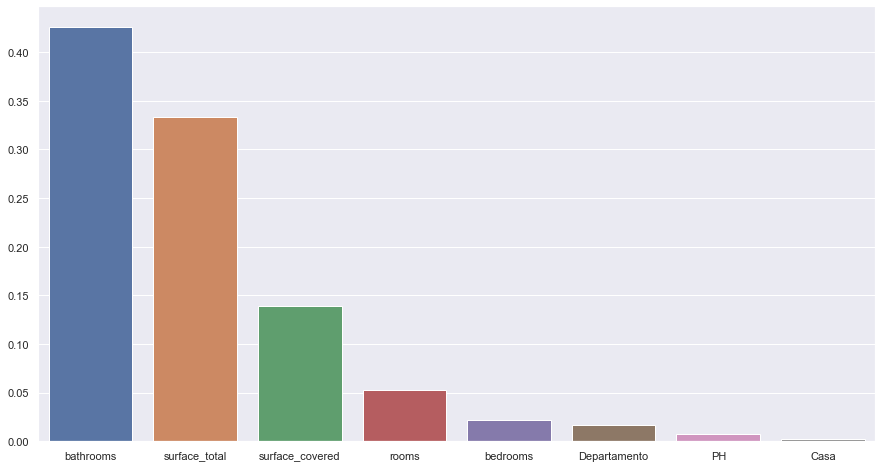

In [176]:
importances = ran_forest16.feature_importances_
columns = x_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

##### Antes de pasar a analizar esta información imprimiremos unas lineas que nos ayudarán a sostener lo que se mencionará.

In [179]:
print('La moda de baños es de:', stat.mode(data.bathrooms))
print('La mediana de baños es de:', np.nanmedian(data.bathrooms))

print('La varianza de baños es de:', data.bathrooms.var(ddof = 1))
print('La desviacion estandar de baños es de:', data.bathrooms.std(ddof = 1))

print('La varianza de superficie total es de:', data.surface_total.var(ddof = 1))
print('La desviacion estandar de superficie total es de:', data.surface_total.std(ddof = 1))

print('La varianza de superficie cubierta es de:', data.surface_covered.var(ddof = 1))
print('La desviacion estandar de superficie cubierta es de:', data.surface_covered.std(ddof = 1))

La moda de baños es de: 1.0
La mediana de baños es de: 1.0
La varianza de baños es de: 0.318499251593404
La desviacion estandar de baños es de: 0.5643573793204125
La varianza de superficie total es de: 3114.870895097835
La desviacion estandar de superficie total es de: 55.81102843612394
La varianza de superficie cubierta es de: 972.584827510008
La desviacion estandar de superficie cubierta es de: 31.18629230142641


##### En orden decreciente vemos lo determinante que cada variable fue para nuestro modelo. Podíamos presumir por las labores exploratorias realizadas en el primer proyecto y en este que tanto la superficie total y la cubierta serían las variables más concluyentes para nuestras 'y'. Sin lugar a dudas se admite una relativa sorpresa a que la feature que más incide en el precio sea la de baños. Sin embargo a un rápido análisis tiene mucho sentido. Basta solo con pensar en que bathrooms es la variable de menor varianza y desviación estandar de nuestro dataset; dicho de otra forma es que lo más corriente es que las propiedades analizadas (y las no analizadas también al menos en La Argentina) dispongan de 1 baño por propiedad. Las superficies son algo mucho más 'variable' teniendo en cuenta que las mismas dependen de muchos factores (terreno, cantidad de inmuebles emplazdos por edificio, proyecto urbanístico, etc). Entonces es ciertamente probable encontrarse con muchas propiedades de superficies muy disímiles, aun sean por pocas unidades de medida. En ocasiones, asimismo, podemos ver por ejemplo departamentos de tamaño mediano-chico con 2 dormitorios (el cual probablemente tenga solo 1 baño), como departamentos de tamaño mediano-grande con tan solo 1 dormitorio (el cual puede también ser de dimensión mayor a la media). Sin embargo cuando pensamos en el mercado y cantidad de baños esto pareciera cambiar.
##### Que un inmueble tenga (cuanto menos) más de un baño nos da cuenta de posiblemente ser un inmueble de cierta superficie y con cierta cantidad de dormitorios > 1. Es que podemos imaginar en el mercado monoambientes (presumiendo una superficie modesta) de valores (estimativos) 70.000 dólares, departamentos de un dormitorio de distintas dimensiones y valores desde 70.000 a 130.000, departamentos de dos dormitorios de superficie variable en orden de los 95.000 a 130.000 pero muy seguramente si en este último caso (solo por dar un ejemplo) el departamento tiene al menos mas de un baño seguramente estemos frente a un inmueble de más de un dormitorio también y por ende de mayor superficie a la media. Es decir que tener una propiedad con más de un baño conlleva consigo la circunstancia de ser presumiblemente una propiedad quizás de superficie considerable, de más de un dormitorio, con varios ambientes.
##### Para concluir imprimiremos los estimadores y veremos si en concreto algunos árboles se parecen o difieren en sus estimadores.

In [157]:
ran_forest16.estimators_

[DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=200259953),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1831559240),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=2050288191),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=111180035),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=931257012),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=2120270602),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=293405684),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=729775590),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1111383747),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=554473220),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                

In [164]:
rf_tree6 = ran_forest16.estimators_[6]
rf_tree6.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 293405684,
 'splitter': 'best'}

In [163]:
rf_tree11 = ran_forest16.estimators_[11]
rf_tree11.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 768145189,
 'splitter': 'best'}

In [161]:
rf_tree22 = ran_forest16.estimators_[22]
rf_tree22.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 219440348,
 'splitter': 'best'}

In [162]:
rf_tree33 = ran_forest16.estimators_[33]
rf_tree33.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1936970700,
 'splitter': 'best'}

In [180]:
rf_tree99 = ran_forest16.estimators_[99]
rf_tree99.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1598189909,
 'splitter': 'best'}

In [181]:
rf_tree177 = ran_forest16.estimators_[177]
rf_tree177.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1218412601,
 'splitter': 'best'}

##### De este modo logramos el objetivo de este trabajo, sin embargo quedan lugares a dudas a resolver. Es equivalente trabajar en un mismo dataset para propiedades en CABA para realidades disímiles en conformación como lo son los departamentos, PH, y casas? Sería más sólido probablemente si en este caso los tipos de propiedad estuvieran más balanceados. Por su puesto que contar con un mayor volúmen de instancias favorecerían estadísticamente a resultados más certeros sobre el valore de las propiedades que pudieran analizarse. Por otra parte y respecto al 'desbalanceo', conocemos de antemano que la realidad urbana dentro de la Capital Federal no es uniforme. Hay barrios que ciertamente 'pertenecen' a estratos de muy variada índole propias de una configuración urbana con ingresos y medios de vida diferente. Particularmente estos datos cuentan con una marcada presencia desproporcionada de departamentos en el barrio de Palermo. Se sigue sosteniendo (al igual que en el proyecto 1) que quizás estos datos serían aún mejor para predecir los valores de departamentos de dicho barrio, so riesgo que de lo contrario se normaliza a la fuerza lo que la realidad parece no representar.
##### De todas maneras se destaca que la labor realizada con la ingienería de variables es lo suficientemente sólida para garantizar el menor error posible de obtener para los modelos que se han entrenado. Se recuerda que en total se trabajó con 8 modelos en total, 5 pertenecen a la 'parte B', por lo que la tarea en la búsqueda de un regresor confiable se asume lograda.
